In [1]:
from PIL import Image
import glob
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    
    print(len(images), "images to be resized.")
    
    # 파일마다 모두 28x28사이즈로 바꾸어 저장한다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들임
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("Image Resize Success")

539 images to be resized.
539  images resized.
Image Resize Success


In [2]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

389 images to be resized.
389  images resized.


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

427 images to be resized.
427  images resized.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_data(img_path, number_of_data=1400):
    # 가위:0, 바위:1, 보:2
    img_size=28
    color=3
    # 이미지 데이터와 라벨(가위:0, 바위:1, 보:2) 데이터를 담을 행렬 영역을 생성한다
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img        # 데이터 영역에 이미지 행렬 복사
        labels[idx]=0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0

print("x_train shape : {}".format(x_train.shape))
print("y_train shape : {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 1355 입니다.
x_train shape : (1400, 28, 28, 3)
y_train shape : (1400,)


라벨:  0


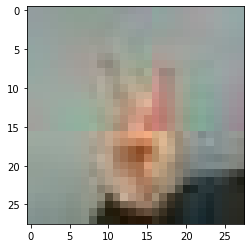

In [5]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

compile 할 때, optimizer = adam -> rmsprop(다중클래스)로 바꿔봤으나 너무 더 낮다

In [7]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

198 images to be resized.
198  images resized.
205 images to be resized.
205  images resized.
221 images to be resized.
221  images resized.


In [8]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 624 입니다.
x_test shape : (1400, 28, 28, 3)
y_test shape : (1400,)


In [9]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

44/44 - 0s - loss: 0.7300 - accuracy: 0.8393
test_loss : 0.7299733757972717
test_accuracy : 0.8392857313156128


In [10]:
predicted_result = model.predict(x_test_norm)	# model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=600
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [8.4924531e-01 2.0902660e-06 1.5075256e-01]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  2


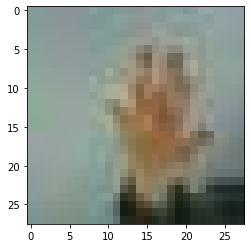

In [11]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

model이 틀린 경우 찾아보기


예측확률분포: [8.4924531e-01 2.0902660e-06 1.5075256e-01]
라벨: 2, 예측결과: 0


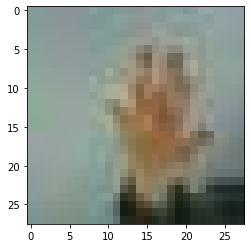

예측확률분포: [0.9396278  0.00181    0.05856219]
라벨: 2, 예측결과: 0


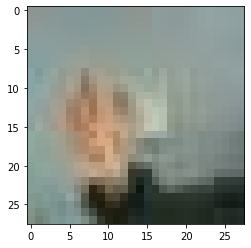

예측확률분포: [0.9678056  0.02238914 0.00980527]
라벨: 2, 예측결과: 0


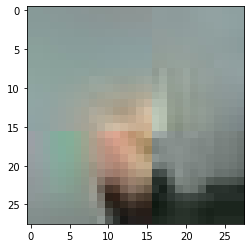

예측확률분포: [9.9508411e-01 4.9072048e-03 8.6726195e-06]
라벨: 1, 예측결과: 0


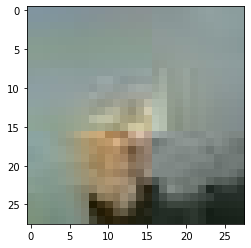

예측확률분포: [9.7331071e-01 2.6375081e-02 3.1424125e-04]
라벨: 1, 예측결과: 0


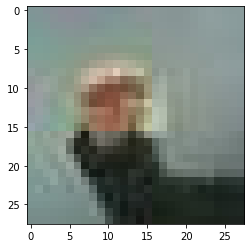

예측확률분포: [0.9828789  0.00269026 0.01443074]
라벨: 2, 예측결과: 0


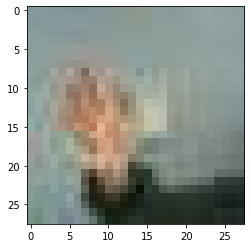

예측확률분포: [0.72424084 0.2102579  0.06550119]
라벨: 1, 예측결과: 0


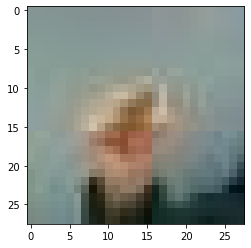

예측확률분포: [0.64839053 0.00531285 0.34629664]
라벨: 2, 예측결과: 0


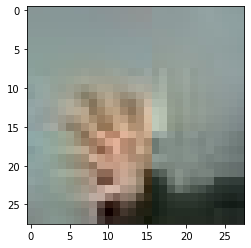

예측확률분포: [0.89018154 0.10820709 0.00161136]
라벨: 2, 예측결과: 0


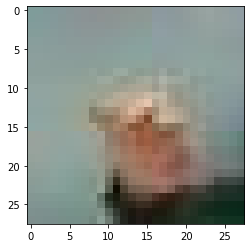

예측확률분포: [0.9906556  0.0020191  0.00732532]
라벨: 2, 예측결과: 0


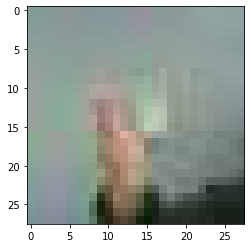

In [12]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()